# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics for the two artists you selected in Module 1 and the Twitter descriptions pulled for Robyn and Cher. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [92]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [93]:
# Use this space for any additional import statements you need



In [94]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here

    # Fill in the correct values here. 

    # num_tokens is the length of the text that gets passed into the function
    num_tokens = len(tokens)

    # num_unique_tokens contains the "set" data type, which represents a 
    # collection of unique elements. It lets us get a unique count of 
    # different words in the text.
    num_unique_tokens = len(set(tokens))

    # To get lexical diversity, we divide the number of unique tokens
    # by the total. If the number of unique tokens is identical to the 
    # total, then we get a perfect lexical diversity of 1. 
    lexical_diversity = num_unique_tokens / num_tokens

    # We use a for loop here to access the letters within the tokens.
    # To do this, we take a length of each word within the text, 
    # then sum it.
    num_characters = sum(len(token) for token in tokens)
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])


    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens):
    """
    This function removes stopwords from a list of tokens.
    """
    # Use a list comprehension to filter out any tokens that are in the stopwords list
    tokens = [token for token in tokens if token.lower() not in sw]
    
    return tokens
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text):
    """
    Tokenizes the given text by splitting on whitespace. 
    """
    # Split the text on whitespace
    text = text.split()

    return(text)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [95]:
# Feel free to use the below cells as an example or read in the data in a way you prefer

data_location = "" # change to your location if it is not in the same directory as your notebook
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

twitter_artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [96]:
twitter_data = pd.read_csv(data_location + twitter_folder + twitter_artist_files['cher'],
                           sep="\t",
                           quoting=3)

twitter_data['artist'] = "cher"

In [97]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + twitter_artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [98]:
# read in the lyrics here

# I will use the same method I used in module 2's assignment

# Read in the lyrics data
def read_lyrics_data(folder_path):
    # Set up the dictionary for storing the data
    lyrics_data = defaultdict(dict)

    # Use the imported os dictionary, which lets us access the underlying
    # operating system being run and treats it kind of like an API that
    # it is interacting with. 
    # "os.walk()" is a generator that walks a dictionary tree and returns
    # a tuple of 3 values (root, dirs, files). The whole purpose of this is to 
    # access the files via code within the directories and get the information
    # out of them to put into the dictionary we set up.
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            
            # Extract information when dealing with the text files
            if file.endswith(".txt"):
                
                # Divides up the artist and song based on the underscore
                artist, song = file[:-4].split('_') 

                # Read in the data by opening the files and using f.read() 
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    lyrics_data[artist][song] = f.read()
    return lyrics_data

# We use the "lyrics" prefix to access the contents of the lyrics folder
lyrics_data = read_lyrics_data(lyrics_folder)

## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [99]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 

# I needed to add more code to process the lyrics data
# since the previous iteration would not work with the structure of my 
# files. The following function is set up to apply the pipeline
# structure to the lyrics data.
# Function to apply the pipeline to text
def apply_pipeline(text, pipeline):
    for transform in pipeline:
        text = transform(text)
    return text

# New dictionary to store the results
processed_data = defaultdict(dict)

# Iterating through the original dictionary to extract lyrics
for artist in lyrics_data:
    for song in lyrics_data[artist]:
        lyrics = lyrics_data[artist][song]
        processed_data[artist][song] = apply_pipeline(lyrics, my_pipeline)

In [100]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [101]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
662720,cher,University of San Francisco BASEBALL WCC ⚾️Tea...,"[university, san, francisco, baseball, wcc, ⚾️..."
209167,robyn,27. Ireland 🇨🇮👫🐼 If you always do what you've ...,"[27, ireland, 🇨🇮👫🐼, always, youve, always, don..."
52693,robyn,She/Her 💫💜💫💙💫💜💫💙 Boop beep bop let's overshare...,"[sheher, 💫💜💫💙💫💜💫💙, boop, beep, bop, lets, over..."
2513162,cher,don't ever let anyone dull your sparkle. ⚡️For...,"[dont, ever, let, anyone, dull, sparkle, ⚡️for..."
34151,cher,You Live & Learn to accept to find YOUR PEACE....,"[live, learn, accept, find, peace, 🌅]"
630772,cher,💙 Sheffield 🦉💙 #BrokenRecord #LetTheMusicPlay ...,"[💙, sheffield, 🦉💙, #brokenrecord, #letthemusic..."
1157065,cher,"Retired, proud San Francisco Liberal, yearning...","[retired, proud, san, francisco, liberal, year..."
1767229,cher,Mai usato Twitter attivamente 🙈 (se non per se...,"[mai, usato, twitter, attivamente, 🙈, se, non,..."
2142640,cher,♥♥ live ur life n b fabulous ♥♥,"[♥♥, live, ur, life, n, b, fabulous, ♥♥]"
1936732,cher,™MOB™ I RIDE OR DIE~KEEP SHIT ON 1000 FREE MY ...,"[™mob™, ride, diekeep, shit, 1000, free, nigga..."


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: One way to improve the tokenization of the text, especially as it relates to the Twitter data, is to have some way to tokenize slang words and internet memes. The internet has produced a lot of creative content around what are essentially inside jokes. These memes are context specific and basically unknowable unless one sees its use in more than one context. Therefore, a custom dictionary would probably work well. 

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [84]:
# I needed to update the method of descriptive statistics calculation 
# slightly because the function wasn't working as it was given me
# an error saying it was expecting strings but got instances of lists.
def calculate_descriptive_statistics_for_artists(processed_data):
    stats = {}
    for artist, songs in processed_data.items():
        # Convert token lists to strings and concatenate all songs' lyrics
        all_lyrics = " ".join([" ".join(tokens) for tokens in songs.values()])

        # Tokenize the concatenated lyrics
        tokens = tokenize(all_lyrics)

        # Calculate descriptive statistics
        artist_stats = descriptive_stats(tokens, num_tokens=5, verbose=True)

        # Store the stats 
        stats[artist] = artist_stats

    return stats

# Example usage
artists_stats = calculate_descriptive_statistics_for_artists(processed_data)

# Print out the statistics for each artist
for artist, stat in artists_stats.items():
    print(f"Statistics for {artist}: {stat}")


Statistics for jonimitchell: [2649, 1642, 0.6198565496413742, 16876]
Statistics for kanyewest: [8496, 3270, 0.3848870056497175, 46238]


Q: what observations do you make about these data? 

A: Based on these descriptive statistics, we know that Kanye's songs contain a much higher count of lyrics than Joni's songs. However, his lexical diversity is lower, indicating he repeats a lot of words in song's compared to Joni. Kanye also has a higher total number of characters than Joni, which is indicative of the verbosity of his music. This makes sense if you listen to their music, where Joni Mitchell often sings slowly in harmony with a guitar or piano while Kanye will rap quickly over his beats.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
2. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

Note from KB: I just could not figure out a solution where I could do all 4 corpora and either not have it be prohibitively computationally intensive where it took hours to run or come up with empty lists when I printed results. Ultimately, I decided to keep it with the 2 corpora and not do the twitter data. This ended up letting the code run faster and produce the unique tokens with some interesting results that I could comment on below. 

In [145]:
def unique_tokens_by_concentration(processed_data, cutoff=5):
    # Combine all tokens from each corpus
    all_tokens = {artist: [token for song in songs.values() for token in song] 
                  for artist, songs in processed_data.items()}

    # Calculate frequencies for each corpus
    frequencies = {artist: Counter(tokens) for artist, tokens in all_tokens.items()}

    # Total number of tokens in each corpus
    total_tokens = {artist: sum(freq.values()) for artist, freq in frequencies.items()}

    # Calculate concentration for each token in each corpus
    concentrations = {artist: {token: freq / total_tokens[artist] 
                               for token, freq in freqs.items()} 
                      for artist, freqs in frequencies.items()}

    # Calculate concentration ratios and filter by cutoff
    unique_tokens = defaultdict(dict)
    for artist in processed_data:
        for token in concentrations[artist]:
            if sum(frequencies[other_artist][token] for other_artist in processed_data if other_artist != artist) >= cutoff:
                concentration_ratio = concentrations[artist][token] / max(
                    concentrations[other_artist].get(token, 1e-10) 
                    for other_artist in processed_data if other_artist != artist)
                unique_tokens[artist][token] = concentration_ratio

    # Identify top 10 unique tokens for each corpus
    top_unique_tokens = {artist: sorted(tokens.items(), key=lambda x: x[1], reverse=True)[:10] 
                         for artist, tokens in unique_tokens.items()}

    return top_unique_tokens

# Apply the function to your data
top_unique_tokens = unique_tokens_by_concentration(processed_data)

# Print the results
for artist, tokens in top_unique_tokens.items():
    print(f"Top unique tokens for {artist}: {tokens}")


Top unique tokens for jonimitchell: [('comes', 5.345413363533409), ('love', 4.687516334175451), ('heart', 4.5817828830286365), ('city', 4.490147225368063), ('light', 4.490147225368063), ('found', 4.490147225368063), ('find', 4.276330690826727), ('always', 3.6654263064229085), ('would', 3.2072480181200453), ('ask', 3.2072480181200453)]
Top unique tokens for kanyewest: [('im', 6.610028248587571), ('cant', 1.9746939736346514), ('like', 1.8300939572586588), ('man', 1.826220742534302), ('said', 1.7148658192090396), ('go', 1.5873138161273754), ('thats', 1.5070032956685497), ('say', 1.4342514124293786), ('take', 1.3808010492332528), ('back', 1.247175141242938)]


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: One of the interesting ones is the word "love." It does not appear in Kanye's lyrics even though it does in Joni's. Both sets of lyrics are the first 25 songs of their discographies. These songs are from Joni's late 60s career that was heavily influenced by the bohemian 60s culture. Kanye's first few albums were his debuts in the 2000s, and are socially conscious about issues like race and class. It is nonetheless surprising that he does not say "love" at all in the songs sample. Another interesting one to think about is the word "cant." I know there's a song in this list where Kanye says "you cant tell me nuthin'". It is from a song on the album called "College Dropout." It is a simple shortening of "cannot" but apparently was too informal for Joni's lyrics in the late 1960s. 

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [146]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

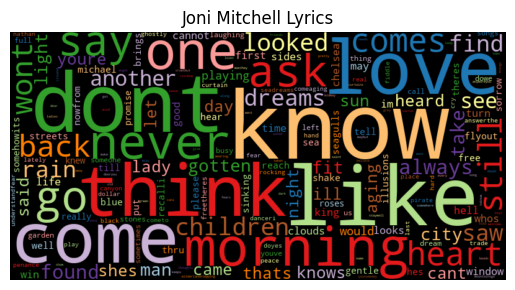

In [147]:
# Prepare frequency data for Joni Mitchell's lyrics
joni_mitchell_freq = count_words(pd.DataFrame({'tokens': processed_data['jonimitchell'].values()}))

# Create a word cloud for Joni 
wordcloud(joni_mitchell_freq['freq'], title="Joni Mitchell Lyrics", max_words=200, stopwords=sw)
plt.show()


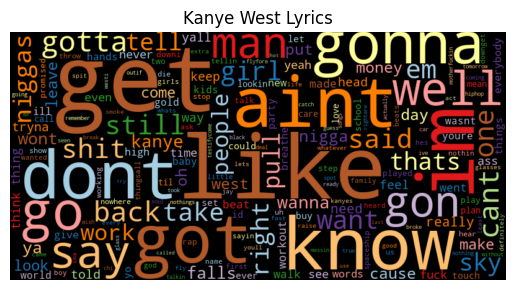

In [148]:
# Prepare frequency data for Kanye West's lyrics
kanye_west_freq = count_words(pd.DataFrame({'tokens': processed_data['kanyewest'].values()}))

# Create the word cloud for Kanye 
wordcloud(kanye_west_freq['freq'], title="Kanye West Lyrics", max_words=200, stopwords=sw)
plt.show()


Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: A word that sticks out to me that did not previously was the word "know." Both artists have this word come up a lot. One of the other big words for both is the word "like." It is part of their art to create metaphors in their music. Kanye might say, "Is in the pocket like wallets, I got the bounce like hydraulics, I can't call it, I got the swerve like alcoholics" while Joni might say, "And the sun poured in like butterscotch and stuck to all my senses." Both are always creating these visual metaphors in their music. One unique part of Kanye's word cloud is he says "get" and "got" a lot, whereas Joni does not. It is interesting to think of why he would always be using this form of "to receive something" while Joni does not. 